In [ ]:
Q1>>>>

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


#one_=np.ones((x_train.shape[0],1))
#one_te=np.ones((x_test.shape[0],1))
#x_train=np.concatenate((x_train,one_),axis=1)
#x_test=np.concatenate((x_test,one_te),axis=1)
print('x_train',x_train.shape)
print('x_test',x_test.shape)
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)

#w1=np.concatenate((b1,w1),axis=0)
print('w1',w1.shape)
batch_size = Ntr
iterations =301
lr =1.2e-2
lr_decay=0.999
reg =1e-6
loss_history = []
train_acc_history = []
train_acc_history_2 = []
lr_hitory=[]
val_acc_history = []
seed = 0
#rng = np.random.default_rng(seed=seed)


#Gradient Descent
for t in range(iterations):
    # Forward pass
    #print(t)
    h=x_train.dot(w1)+b1
    #loss = (1/(2*m))*np.sum(( h - y_train)**2) + (1/(2*m))*reg*np.sum(w1**23)
    #
    loss=(1/(batch_size))*(np.sum((h-y_train)**2))+reg*np.sum(w1*w1)
    loss_history.append(loss)

    # Backward pass
    dw1 = (2/batch_size)*((x_train.T.dot(h - y_train))  + reg*w1)
    w1 -= lr*dw1

    #lr_hitory.append(lr)
    lr_hitory.append(lr)
    lr = lr*lr_decay

    train_acc= 1-1/(10*batch_size) *(np.abs(np.argmax(h, axis=1)-np.argmax(y_train, axis=1))).sum()
    train_acc_history.append(train_acc)

    test_acc= 1-1/(10*batch_size) *(np.abs(np.argmax(x_test.dot(w1), axis=1)-np.argmax(y_test, axis=1))).sum()
    val_acc_history.append(test_acc)

    if ((t+1)%10==0) or (t==1) or (t==2) or(t==0):
        print("Epoch",t+1, "|", "Loss",loss_history[-1],"|", "Training Acc:",train_acc_history[-1],'|', 'Validation Acc:',val_acc_history[-1] ,'|','Learning Rate:',lr)


'''
#weights = w1 #w1[1:,] # Removing the row of bias terms.
fig, ax = plt.subplots(1,4, figsize=(30,6))
ax[0].plot(loss_history)
ax[0].set_ylim(0.5,1.1)
ax[1].plot(train_acc_history)
ax[1].set_ylim(0,55)
ax[2].set_ylim(0,55)
ax[2].plot(val_acc_history)
ax[3].plot(lr_hitory)
ax[3].set_ylim(0.005,0.02)

ax[0].set_title('Loss')
ax[1].set_title('Training Set Accuracy')
ax[2].set_title('Test Set Accuracy')
ax[3].set_title('Learning Rate')

weights_pos =  w1- np.min(w1)# Making the minimum weight zero.
images = ((weights_pos/np.max(weights_pos))*255).astype('uint8')
class_label = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
fig, axes  = plt.subplots(2,5, sharex='all', sharey='all', figsize=(25,10))
#location = 1 # Location of the image in the grid of 2x5
for i in range(K):
    image = images[:,i].reshape(32,32,3)
    plt.subplot(2,5,i+1),plt.imshow(image[:,:,::-1])
    title="Class:"+str(class_label[i])
    plt.title(title) 
 '''
# Printing accuracies and displaying w as images

x_train: (50000, 32, 32, 3)
x_train (50000, 3072)
x_test (10000, 3072)
w1: (3072, 10)
b1: (10,)
w1 (3072, 10)
Epoch 1 | Loss 1.0000270333320884 | Training Acc: 0.66177 | Validation Acc: 0.94309 | Learning Rate: 0.011988
Epoch 2 | Loss 0.9641749810770884 | Training Acc: 0.712044 | Validation Acc: 0.9474940000000001 | Learning Rate: 0.011976012000000001
Epoch 3 | Loss 0.9508639507947926 | Training Acc: 0.732612 | Validation Acc: 0.948096 | Learning Rate: 0.011964035988
Epoch 10 | Loss 0.9239622172311144 | Training Acc: 0.753368 | Validation Acc: 0.951376 | Learning Rate: 0.011880538562516979
Epoch 20 | Loss 0.9128862142091629 | Training Acc: 0.760802 | Validation Acc: 0.95322 | Learning Rate: 0.011762266377954415
Epoch 30 | Loss 0.9073287674823459 | Training Acc: 0.764368 | Validation Acc: 0.95392 | Learning Rate: 0.011645171607157025
Epoch 40 | Loss 0.9037224609297155 | Training Acc: 0.767212 | Validation Acc: 0.954218 | Learning Rate: 0.011529242528829739
Epoch 50 | Loss 0.901114973543

'\n#weights = w1 #w1[1:,] # Removing the row of bias terms.\nfig, ax = plt.subplots(1,4, figsize=(30,6))\nax[0].plot(loss_history)\nax[0].set_ylim(0.5,1.1)\nax[1].plot(train_acc_history)\nax[1].set_ylim(0,55)\nax[2].set_ylim(0,55)\nax[2].plot(val_acc_history)\nax[3].plot(lr_hitory)\nax[3].set_ylim(0.005,0.02)\n\nax[0].set_title(\'Loss\')\nax[1].set_title(\'Training Set Accuracy\')\nax[2].set_title(\'Test Set Accuracy\')\nax[3].set_title(\'Learning Rate\')\n\nweights_pos =  w1- np.min(w1)# Making the minimum weight zero.\nimages = ((weights_pos/np.max(weights_pos))*255).astype(\'uint8\')\nclass_label = [\'Airplane\', \'Automobile\', \'Bird\', \'Cat\', \'Deer\', \'Dog\', \'Frog\', \'Horse\', \'Ship\', \'Truck\']\nfig, axes  = plt.subplots(2,5, sharex=\'all\', sharey=\'all\', figsize=(25,10))\n#location = 1 # Location of the image in the grid of 2x5\nfor i in range(K):\n    image = images[:,i].reshape(32,32,3)\n    plt.subplot(2,5,i+1),plt.imshow(image[:,:,::-1])\n    title="Class:"+str(c

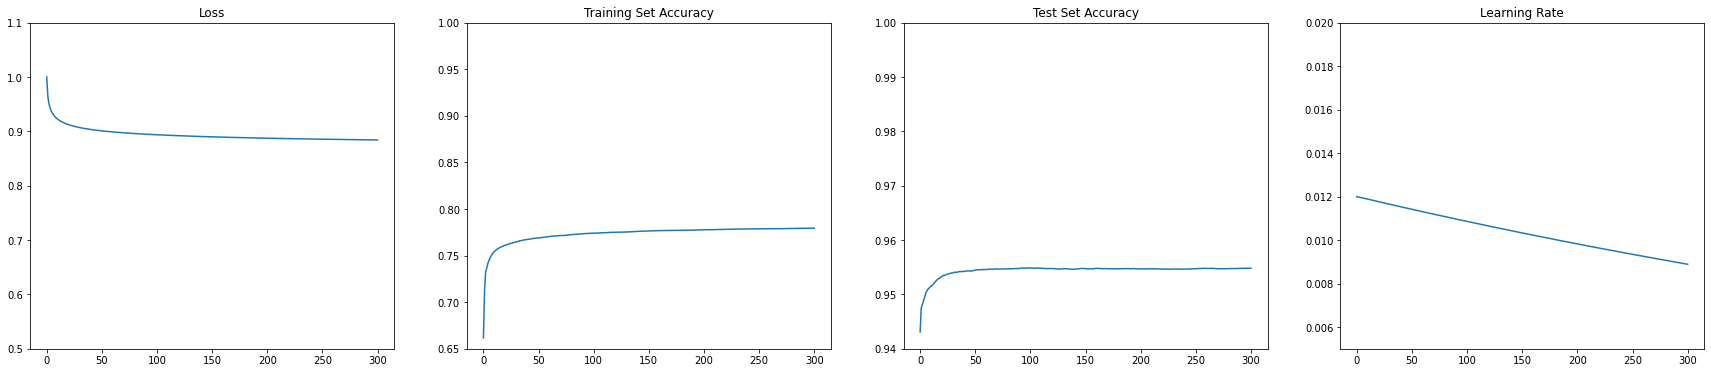

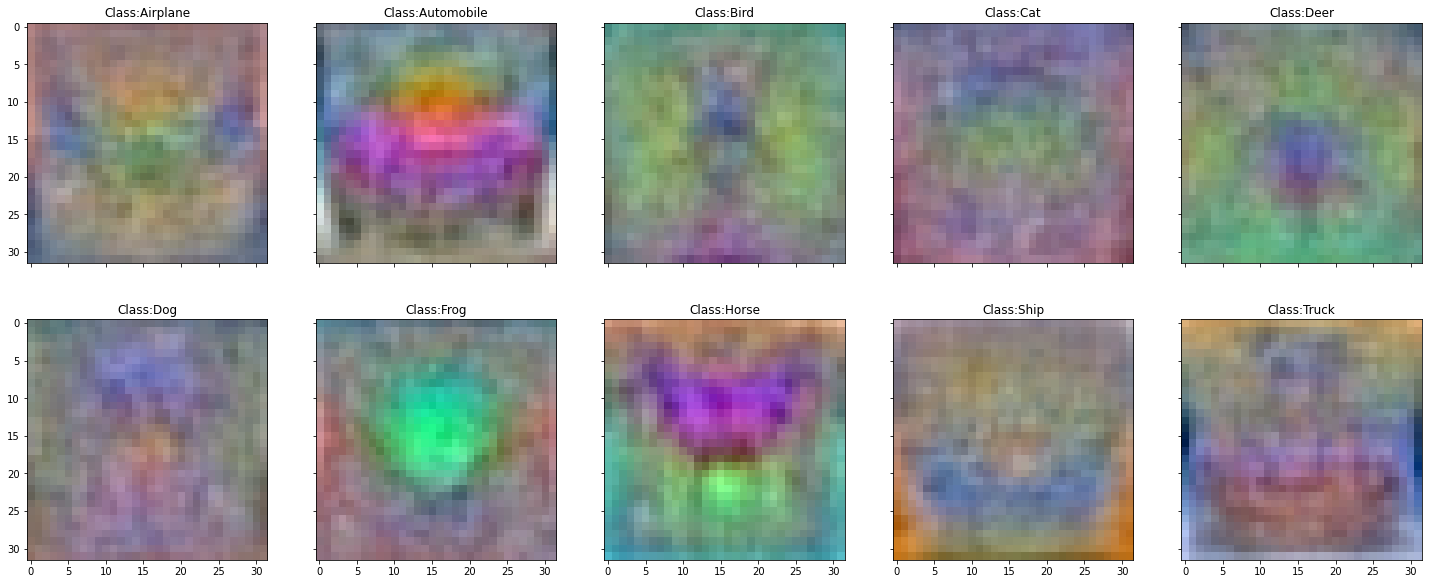

In [23]:
fig, ax = plt.subplots(1,4, figsize=(30,6))
ax[0].plot(loss_history)
ax[0].set_ylim(0.5,1.1)
ax[1].plot(train_acc_history)
ax[1].set_ylim(0.65,1)
ax[2].set_ylim(0.94,1)
ax[2].plot(val_acc_history)
ax[3].plot(lr_hitory)
ax[3].set_ylim(0.005,0.02)

ax[0].set_title('Loss')
ax[1].set_title('Training Set Accuracy')
ax[2].set_title('Test Set Accuracy')
ax[3].set_title('Learning Rate')

weights_pos =  w1- np.min(w1)# Making the minimum weight zero.
images = ((weights_pos/np.max(weights_pos))*255).astype('uint8')
class_label = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
fig, axes  = plt.subplots(2,5, sharex='all', sharey='all', figsize=(25,10))
#location = 1 # Location of the image in the grid of 2x5
for i in range(K):
    image = images[:,i].reshape(32,32,3)
    plt.subplot(2,5,i+1),plt.imshow(image[:,:,::-1])
    title="Class:"+str(class_label[i])
    plt.title(title) 
 
 

In [ ]:
Q2>>>>>>>>

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
H=200
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')



print('x_train',x_train.shape)
print('x_test',x_test.shape)
std=1e-5
w1 = std*np.random.randn(Din, H)
b1 = np.zeros(H)
w2 = std*np.random.randn(H, K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)


batch_size=Ntr
iterations = round(Ntr/batch_size)*301  # Gradient descent interations
lr =1.2e-2
lr_decay=0.999
reg =1e-6
lr_hist = []
loss_history = [] # Vlaues of loss function at each iteration 
train_acc_history = [] # Training accuracy
val_acc_history = [] # Validation accuracy


for t in range(iterations):
    batch_indices=np.random.choice(Ntr,batch_size)
    x=x_train[batch_indices]
    y=y_train[batch_indices]
    h=1/(1+np.exp(-(x.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2
    loss=(1./batch_size)*np.square(y_pred-y).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
    loss_history.append(loss)


    dy_pred=1/batch_size*2*(y_pred-y)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h)).sum(axis=0)
    db1=(dh*h*(1-h)).sum(axis=0)

    x_t=x_train
    #print('xt',xt.shape)
    h=1/(1+np.exp(-(x_t.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2

    train_acc= 1-1/(10*Ntr) *(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum()
    #print('train_acc',train_acc)
    train_acc_history.append(train_acc)

    x_t=x_test
    #print('xt',xt.shape)
    h=1/(1+np.exp(-(x_t.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2

    test_acc= 1-1/(10*Nte) *(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred,axis=1))).sum()
    val_acc_history.append(test_acc)

    w1-=lr*dw1
    w2-=lr*dw2
    b1-=lr*db1
    b2-=lr*b2
    lr_hist.append(lr)
    lr*=lr_decay
    if ((t+1)%10==0) or (t==1) or (t==2) or(t==0):
        print("Epoch %d | Loss:  %f | Training Acc: %f | Validation Acc: %f |Learning Rate:%f" %((t+1),loss_history[-1],train_acc_history[-1],val_acc_history[-1],lr_hist[-1]))

x_train: (50000, 32, 32, 3)
x_train (50000, 3072)
x_test (10000, 3072)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
Epoch 1 | Loss:  1.000112 | Training Acc: 0.750000 | Validation Acc: 0.750000 |Learning Rate:0.014000
Epoch 2 | Loss:  0.916044 | Training Acc: 0.630000 | Validation Acc: 0.630000 |Learning Rate:0.013986
Epoch 3 | Loss:  0.902603 | Training Acc: 0.750000 | Validation Acc: 0.750000 |Learning Rate:0.013972
Epoch 10 | Loss:  0.900059 | Training Acc: 0.750000 | Validation Acc: 0.750000 |Learning Rate:0.013875
Epoch 20 | Loss:  0.899541 | Training Acc: 0.640252 | Validation Acc: 0.640930 |Learning Rate:0.013736
Epoch 30 | Loss:  0.892006 | Training Acc: 0.663158 | Validation Acc: 0.664770 |Learning Rate:0.013600
Epoch 40 | Loss:  0.890349 | Training Acc: 0.652140 | Validation Acc: 0.650310 |Learning Rate:0.013464
Epoch 50 | Loss:  0.889940 | Training Acc: 0.650076 | Validation Acc: 0.649440 |Learning Rate:0.013330
Epoch 60 | Loss:  0.890157 | Training Acc: 0.655232 | Val

KeyboardInterrupt: 

In [ ]:




fig, ax = plt.subplots(1,4, figsize=(30,6))
ax[0].plot(loss_history)
ax[0].set_ylim(0.5,1.1)
ax[1].plot(train_acc_history)
ax[1].set_ylim(0.5,1)
ax[2].set_ylim(0.5,1)
ax[2].plot(val_acc_history)
ax[3].plot(lr_hitory)
ax[3].set_ylim(0.005,0.02)

ax[0].set_title('Loss')
ax[1].set_title('Training Set Accuracy')
ax[2].set_title('Test Set Accuracy')
ax[3].set_title('Learning Rate')

#weights_pos =  w1- np.min(w1)# Making the minimum weight zero.
#images = ((weights_pos/np.max(weights_pos))*255).astype('uint8')
class_label = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
fig, axes  = plt.subplots(2,5, sharex='all', sharey='all', figsize=(25,10))
#location = 1 # Location of the image in the grid of 2x5

fig,ax=plt.subplots(1,5,figsiz=(25,10))
for i in range(K):
    img=w1[:,i].reshape(32,32,3)
    img=img*1000
    plt.subplot(2,5,i+1),
    plt.imshow(img)
    title="Class:"+str(class_label[i])
    plt.title(title) 

In [ ]:
Q4>>>>

In [2]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

#mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()


print('train_images.shape: ', train_images.shape)
print('train_labels.shape: ', train_labels.shape)
print('test_images.shape:', test_images.shape)
print('test_labels.shape:', test_labels.shape)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)
train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(10, activation='sigmoid'))
	# compile model
#opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
#model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	 
'''
        model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
'''
opt = keras.optimizers.SGD(lr=0.012, momentum=0.5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'] )
'''
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

'''
# fit model
print(model.summary())
history = model.fit(train_images, train_labels, epochs=5, batch_size=50, verbose=2)#validation_data=(test_images, test_labels),
#model.fit(train_images, train_labels, epochs=2)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

2.4.1
train_images.shape:  (50000, 32, 32, 3)
train_labels.shape:  (50000, 1)
test_images.shape: (10000, 32, 32, 3)
test_labels.shape: (10000, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4